## Morphological operators for Med image analysis


This time to implement two morphological operators (dilation and erosion) withouth using any high-level libraries. Our goal is to compare your results with standard implementation and hopefully achieve similar results. 

In [ ]:
# !apt install unzip
# !unzip '/content/data.zip' -d  '/content'

# !pip install pydicom

In [ ]:
import pydicom 
from matplotlib import pyplot as plt
file = pydicom.read_file("./data/aorta/1/I10.dicom")
img = file.pixel_array

In [ ]:
from skimage import morphology as mh

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

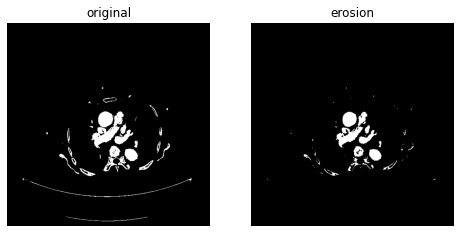

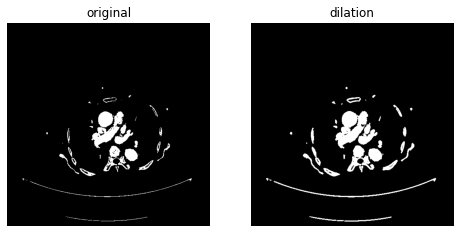

In [ ]:
binarized = img>1200 #some arbitrary thresholding 
plot_comparison(binarized,(mh.erosion(binarized)),"erosion")
plot_comparison(binarized,(mh.dilation(binarized)),"dilation")


In [ ]:
import numpy as np #The only library you allowed to use :D 

In [ ]:
import numpy as np
def my_dillation(image, selem=None):

  n, m = image.shape
  result = np.zeros(image.shape)
  for i in range(0, n):
    for j in range(0, m):
      if image[i, j]:
        if i == 0 and j != 0 and j != m - 1:
          result[i:i+2, j-1:j+2] = 1
        elif i == n - 1 and j != 0 and j != m - 1:
          result[i-1:i+1, j-1:j+2] = 1
        elif j == 0 and i != 0 and i != n - 1:
          result[i-1:i+2, j:j+2] = 1
        elif j == m - 1 and i != 0 and i != n - 1:
          result[i-1:i+2, j-1:j+1] = 1

        elif i == 0 and j == 0:
          result[i:i+2, j:j+2] = 1
        elif i == 0 and j == m - 1:
          result[i:i+2, j-1:j+1] = 1
        elif i == n - 1 and j == 0:
          result[i-1:i+1, j:j+2] = 1
        elif i == n - 1 and j == m - 1:
          result[i-1:i+1, j-1:j+1] = 1
        else: 
          result[i-1:i+2, j-1:j+2] = 1

  return result
        
    
def my_erosion(image, selem=None):
  n, m = image.shape
  mask = np.zeros(image.shape, dtype='bool')
  result = image.copy()
  for i in range(1, n - 1):
    for j in range(1, m - 1):
      if not image[i-1:i+2, j-1:j+2].prod():
        mask[i-1:i+2, j-1:j+2] = True
          
  result[mask] = False
  return result

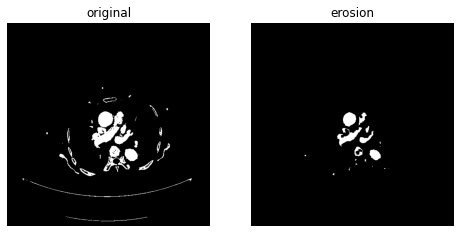

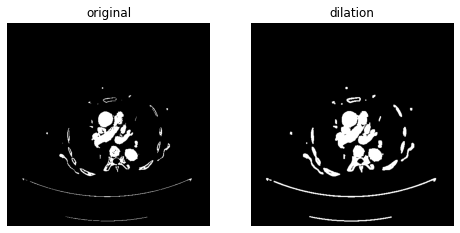

In [ ]:
plot_comparison(binarized,(my_erosion(binarized)),"erosion")
plot_comparison(binarized,(my_dillation(binarized)),"dilation")